![Heart Attack](./misc/heart-attack-24.jpg "Heart Attack")

<h1 align="center"> Heart Attack - Exploratory Data Analysis</h1>

1. [Introduction](#1)
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Brief Explanation of Variables](#3)
    - 1.3 [Task](#4)
2. [Preparation](#5)
    - 2.1 [Packages](#6)
    - 2.2 [Loading Data](#7)
    - 2.3 [Understanding Data](#8)
3. [Exploratory Data Analysis](#9)
    - 3.1 [Univariate Analysis](#10)
    - 3.2 [Bivariate Analysis](#11)
4. [Conclusion](#12)
5. [References](#13)

### 1. Introduction <a id=1></a>

The dataset used in this notebook is from the [UC Irvine Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease)¹.

#### 1.1 Data Dictionary <a id=2></a>
`age` - the patient's age

`sex` - the patient's sex: 0 = female, 1 = male

`cp` - Chest pain type: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic.

`trtbps` - Resting blood pressure (mm/Hg)

`chol` - Cholestorol in mg/dl

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results: 0 = Normal, 1 = ST-T wave ab|normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result: (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

#### 1.2 Brief Explanation of Variables <a id=3></a>

This section provides a brief description on some of the variables, as some readers may not be aware of what some of the terms mean.

`cp` is chest pain type, which mentions a word, "**angina**." Angina is the medical term for chest pain.²

`trtbps` is resting blood pressure, which is measured in a unit (mm/Hg). mm/Hg is millimeters of mercury.³

`chol` - Refers to cholestorol, which is measured in a unit (mg/dl). mg/dl is milligrams per decilitre

`restecg` - Refers to electrocardiographic (ECG) results. An ECG machine measures the electrical activity in the heart.

`thall` - Refers to a thallium stress test. This test measures how well blood pumps to your heart while you're at rest or exercising.

#### 1.3 Task <a id=4></a>

Our task is to perform exploratory data analysis (EDA) by running a couple of statistics to help us understand the data. Then, from running these statistics, we can gain an understanding of the data and give some interesting insights.

TODO: Run some predictions using a few algorithms.

### 2. Preparation <a id=5></a>

We will install packages, and do some preliminary inspections of the data.

#### 2.1 Packages <a id=6></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.2 Loading data <a id=7></a>

In [12]:
df_1 = pd.read_csv('./data/heart.csv',sep=",")

In [13]:
df_1

,"age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output"
0,"63,1,3,145,233,1,0,150,0,2.3,0,0,1,1"
1,"37,1,2,130,250,0,1,187,0,3.5,0,0,2,1"
2,"41,0,1,130,204,0,0,172,0,1.4,2,0,2,1"
3,"56,1,1,120,236,0,1,178,0,0.8,2,0,2,1"
4,"57,0,0,120,354,0,1,163,1,0.6,2,0,2,1"
...,...
298,"57,0,0,140,241,0,1,123,1,0.2,1,0,3,0"
299,"45,1,3,110,264,0,1,132,0,1.2,1,0,3,0"
300,"68,1,0,144,193,1,1,141,0,3.4,1,2,3,0"
301,"57,1,0,130,131,0,1,115,1,1.2,1,1,3,0"


Upon looking at the .csv file, it appears each row is surrounded by quotation marks. This means that each row is being read as one long string of comma-seperated numbers.

There are a couple of ways to handle this problem, but the easiest way I found was to open the .csv file as a .txt file and use the replace function (Edit > Replace) and replace all of the quotation characters with blank characters. Then, we can just read the .txt file.

In [14]:
df = pd.read_csv("./data/heart.txt", sep=",")

In [15]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 2.3 Understanding the Data <a id=8></a>

In [42]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

##### 2.3.1 Preview of the Data

In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The preview of the data shows we only have integer or float values. To be sure, we can use df.info() to see if there are any null values in any of these columns.

##### 2.3.2 Determining if there are non-numerical values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The data has only float or integer values, and there are no null values.

##### 2.3.3 Total number of rows, columns

In [18]:
df.shape

(303, 14)

The dataset are composed of 303 observations, 13 features, and 1 output.

##### 2.3.4 Summary Statistics

In [19]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are a couple of interesting insights here:

- The median age in this dataset is 55 years old
- Most people in this dataset are of the male sex
- Most people in this dataset have atypical angina
- Most people have a fasting blood sugar of less than 120 mg/dl
- Most people have electrocardiographic results that are normal or some ST-T wave abnormality
- Most people do not have angina when induced from exercise

##### 2.3.5 Discrete and Continuous Features

In [44]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'caa', 'thall', 'exng']
cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
output = ['output']

print ("The categorical features are:", cat)
print ("The continuous features are:", cont)
print ("The target variables are:", output)

The categorical features are: ['sex', 'cp', 'fbs', 'restecg', 'caa', 'thall', 'exng']
The continuous features are: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variables are: ['output']


### 3. Exploratory Data Analysis <a id=9></a>

#### 3.1 Univariate Analysis <a id=10></a>

##### 3.1.1 Analysis of Categorical Features

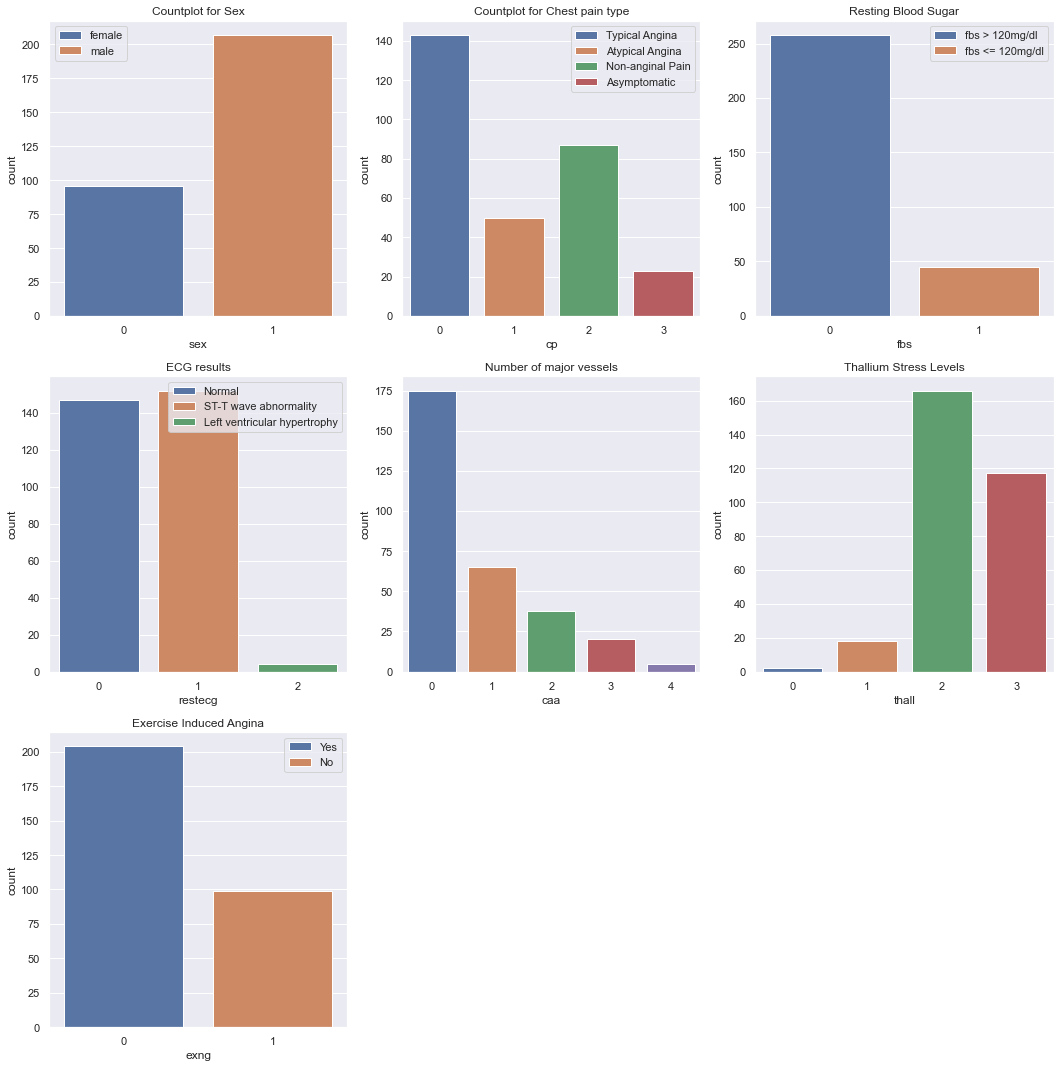

In [141]:
sns.set_theme(style="darkgrid")
names = [['female', 'male'], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'],
         ['fbs > 120mg/dl', 'fbs <= 120mg/dl'], ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'],
         ['Zero', 'One', 'Two', 'Three', 'Four'], ['Zero', 'One', 'Two', 'Three'], ['Yes', 'No']]
titles =["Countplot for Sex", "Countplot for Chest pain type", "Resting Blood Sugar", "ECG results",
         "Number of major vessels", "Thallium Stress Levels", "Exercise Induced Angina"]

fig, ax = plt.subplots(3, 3, figsize=(15,15))

#create countplot for each categorical variable

#countplot for sex category
ax1 = sns.countplot(data=df, x='sex', hue='sex', dodge=False, ax=ax[0,0])
ax1.set_title(titles[0])
ax1.legend(labels=names[0])

#countplot for chest pain category
ax2 = sns.countplot(data=df, x='cp', hue='cp', dodge=False, ax=ax[0,1])
ax2.set_title(titles[1])
ax2.legend(labels=names[1])

#countplot for fasting blood sugar category
ax3 = sns.countplot(data=df, x='fbs', hue='fbs', dodge=False,ax=ax[0,2])
ax3.set_title(titles[2])
ax3.legend(labels=names[2])

#countplot for resting ecg results category
ax4 = sns.countplot(data=df, x='restecg', hue='restecg', dodge=False,ax=ax[1,0])
ax4.set_title(titles[3])
ax4.legend(labels=names[3])

#countplot for major blood vessels category
ax5 = sns.countplot(data=df, x='caa', dodge=False,ax=ax[1,1])
ax5.set_title(titles[4])

#countplot for thallium stress test results category
ax6 = sns.countplot(data=df, x='thall', dodge=False,ax=ax[1,2])
ax6.set_title(titles[5])

#countplot for exercised-induced angina category
ax7 = sns.countplot(data=df, x='exng', hue='exng', dodge=False,ax=ax[2,0])
ax7.set_title(titles[6])
ax7.legend(labels=names[6])

fig.tight_layout()
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

##### 3.1.2 Analysis of Continuous Features

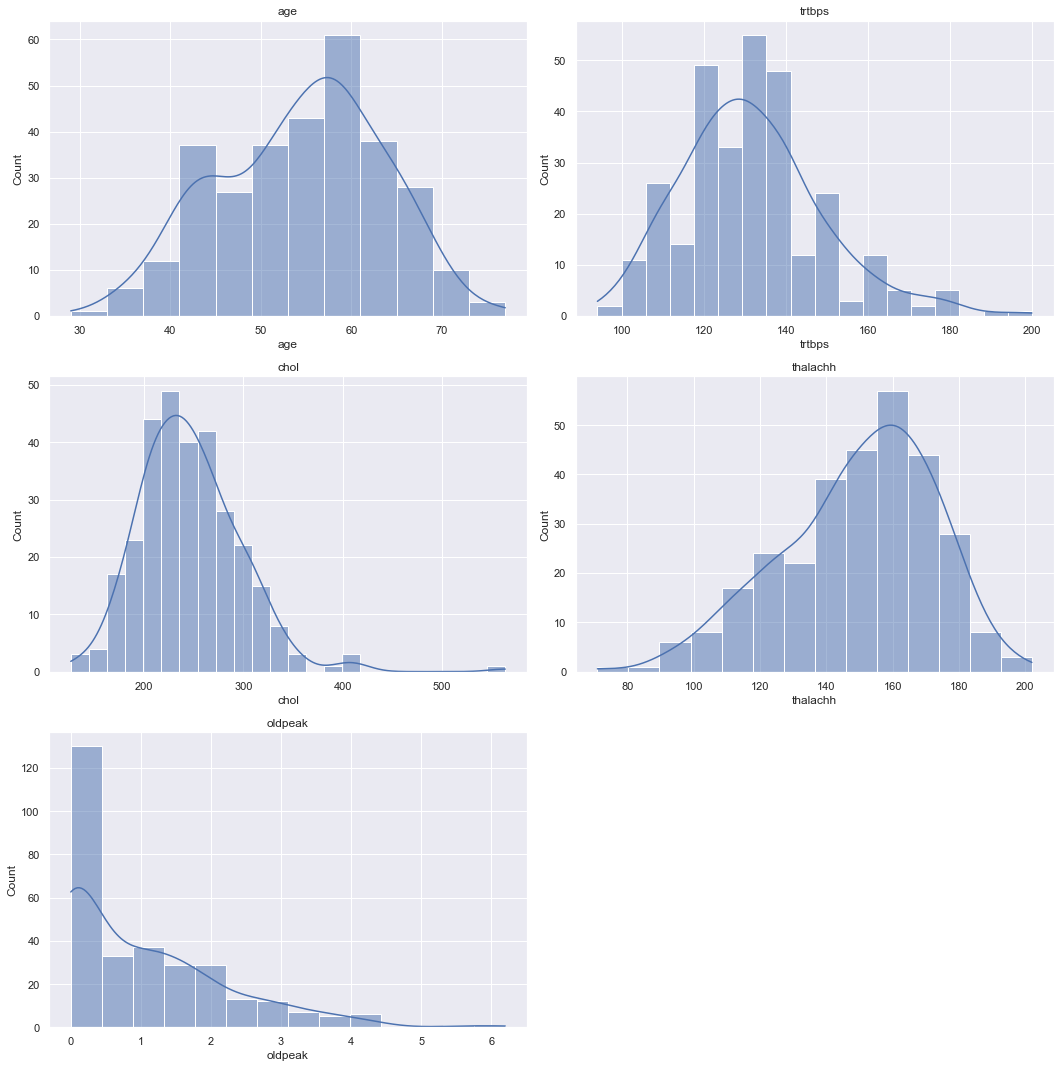

In [142]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

#create histplot for every continuous variable

#histogram for age category
ax1 = sns.histplot(data=df, x='age', kde=True,ax=ax[0,0])
ax1.set_title(cont[0])

#histogram for resting blood pressure category
ax2 = sns.histplot(data=df, x='trtbps', kde=True,ax=ax[0,1])
ax2.set_title(cont[1])

#histogram for cholesterol category
ax3 = sns.histplot(data=df, x='chol', kde=True,ax=ax[1,0])
ax3.set_title(cont[2])

#histogram for maximum heart rate category
ax4 = sns.histplot(data=df, x='thalachh', kde=True,ax=ax[1,1])
ax4.set_title(cont[3])

#histogram for oldpeak category
ax5 = sns.histplot(data=df, x='oldpeak', kde=True, ax=ax[2,0])
ax5.set_title(cont[4])

fig.tight_layout()
fig.delaxes(ax[2,1])

#### 3.2 Bivariate Analysis<a id=11></a>

##### 3.2.1 Bivariate relations between categorical variables and  output

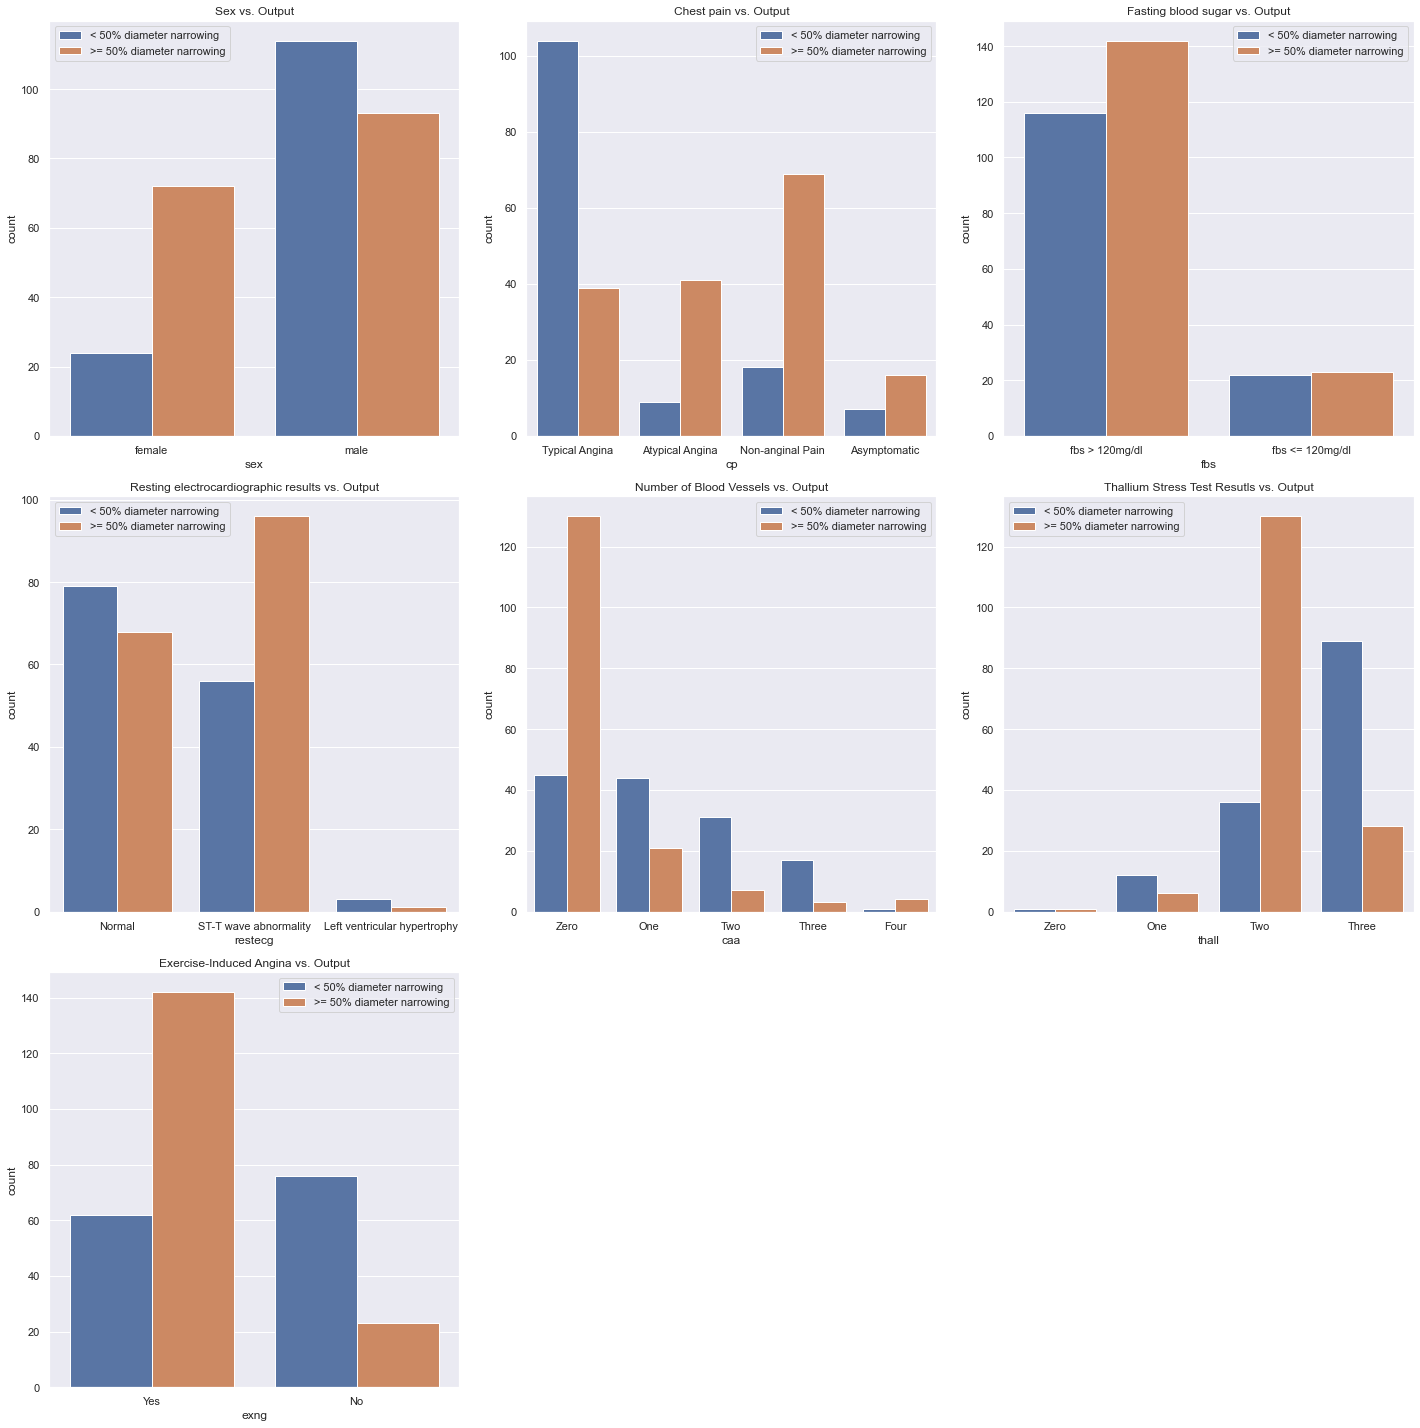

In [146]:
sns.set_style("darkgrid")

narrow = ['< 50% diameter narrowing', '>= 50% diameter narrowing']
fig, ax = plt.subplots(3, 3, figsize=(20,20))
#create countplot for each categorical variable

#countplot for sex vs. output
ax1 = sns.countplot(data=df, x='sex', hue='output', dodge=True, ax=ax[0,0])
ax1.set_xticklabels(names[0])
ax1.legend(narrow)
ax1.set_title("Sex vs. Output")

#countplot for chest pain vs. output
ax2 = sns.countplot(data=df, x='cp', hue='output', dodge=True, ax=ax[0,1])
ax2.set_xticklabels(names[1])
ax2.legend(narrow)
ax2.set_title("Chest pain vs. Output")

#countplot for fasting blood sugar vs. output
ax3 = sns.countplot(data=df, x='fbs', hue="output", dodge=True, ax=ax[0,2])
ax3.set_xticklabels(names[2])
ax3.legend(narrow)
ax3.set_title("Fasting blood sugar vs. Output")

#countplot for resting ecg vs. output
ax4 = sns.countplot(data=df, x='restecg', hue="output", dodge=True, ax=ax[1,0])
ax4.set_xticklabels(names[3])
ax4.legend(narrow)
ax4.set_title("Resting electrocardiographic results vs. Output")

#countplot for number of blood vessels vs. output
ax5 = sns.countplot(data=df, x='caa', hue="output", dodge=True, ax=ax[1,1])
ax5.set_xticklabels(names[4])
ax5.legend(narrow)
ax5.set_title("Number of Blood Vessels vs. Output")

#countplot for thallium stress test results vs. output
ax6 = sns.countplot(data=df, x='thall', hue="output", dodge=True, ax=ax[1,2])
ax6.set_xticklabels(names[5])
ax6.legend(narrow)
ax6.set_title("Thallium Stress Test Resutls vs. Output")

#countplot for exercise-induced angina vs. output
ax7 = sns.countplot(data=df, x='exng', hue="output", dodge=True, ax=ax[2,0])
ax7.set_xticklabels(names[6])
ax7.legend(narrow)
ax7.set_title("Exercise-Induced Angina vs. Output")

fig.tight_layout()
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

##### 3.2.2 Bivariate relations between continuous variables

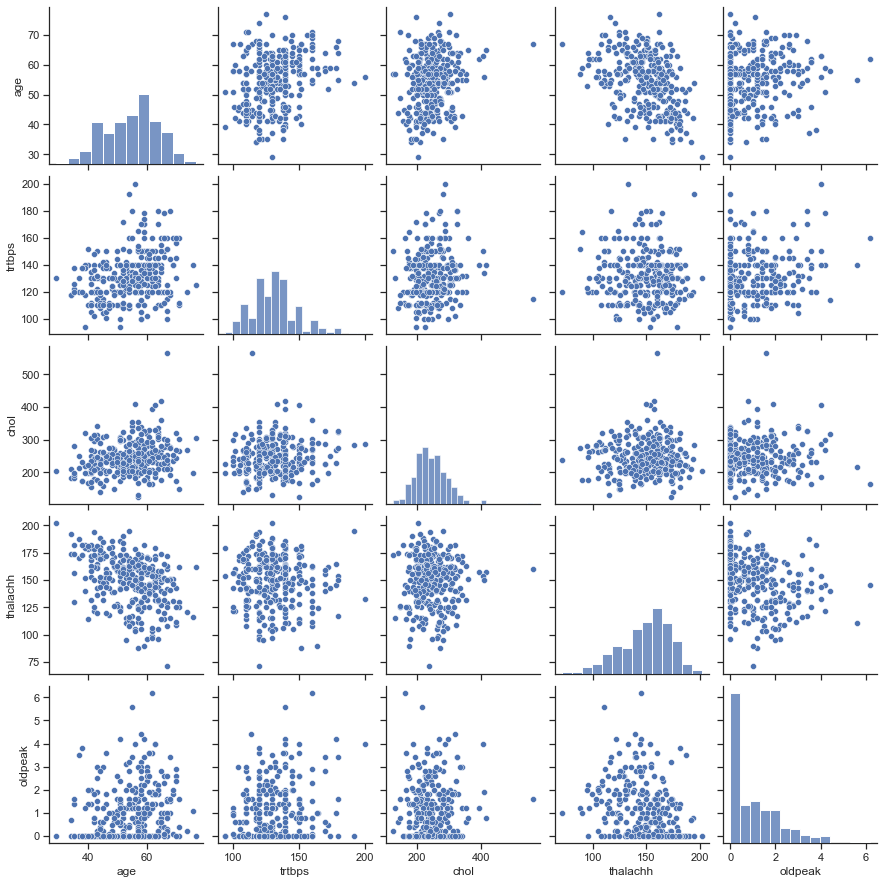

In [147]:
sns.set_theme(style="ticks")
sns.pairplot(df_cont)

##### 3.2.3 Bivariate relations between continuous variables and output

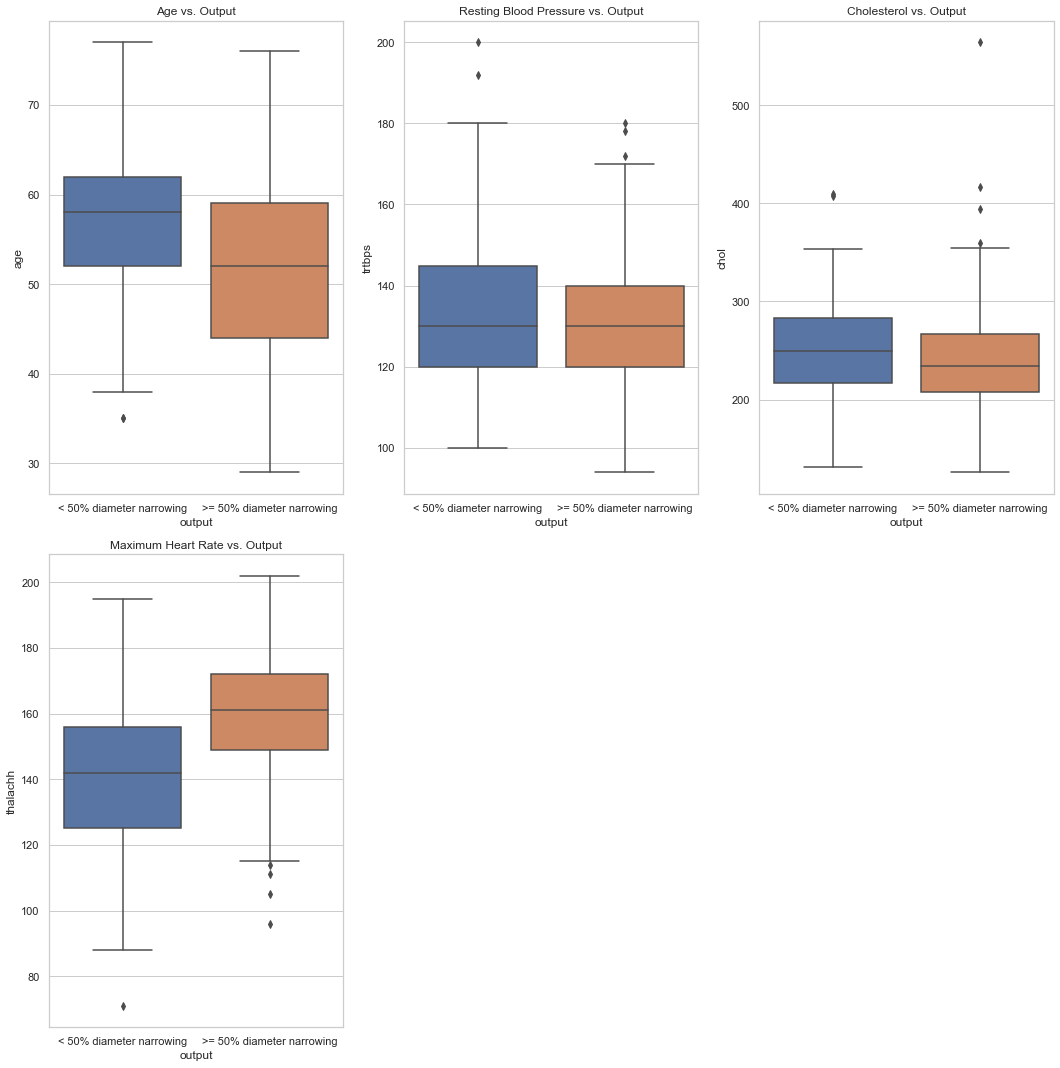

In [172]:
sns.set_style("whitegrid")
cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
fig, ax = plt.subplots(2, 3, figsize=(15,15))

# boxplot for age vs. output
ax1 = sns.boxplot(x="output", y="age", data=df, ax=ax[0,0])
ax1.set_xticklabels(narrow)
ax1.set_title("Age vs. Output")

# boxplot for resting blood pressure vs. output
ax2 = sns.boxplot(x="output", y="trtbps", data=df, ax=ax[0,1])
ax2.set_xticklabels(narrow)
ax2.set_title("Resting Blood Pressure vs. Output")

#boxplot for cholesterol vs. output
ax3 = sns.boxplot(x="output", y="chol", data=df, ax=ax[0,2])
ax3.set_xticklabels(narrow)
ax3.set_title("Cholesterol vs. Output")

ax4 = sns.boxplot(x="output", y="thalachh", data=df, ax=ax[1,0])
ax4.set_xticklabels(narrow)
ax4.set_title("Maximum Heart Rate vs. Output")

fig.tight_layout()
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])

### 4. Conclusions <a id=12></a>

### References

https://archive-beta.ics.uci.edu/ml/datasets/heart+disease ¹

https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain ²

https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained ³